In [36]:
import numpy as np
import math as m
import matplotlib.pyplot as plt
import pandas as pd
import collections as c
import re

podaci = np.genfromtxt("300lip300walk.txt", dtype='str')

f1=open("acids.txt", "r")
ak=f1.readline()
f1.close()

## Pogledat ću frekvencije *trojki bez srednjeg člana* , npr A_A, L_V itd.

In [2]:
def razmaknuti(s):
    a=0
    a=ak.index(s[2])*1+ak.index(s[0])*20
    return(a)

fr_razm=[] #frekvencija tako razmaknutih
for i in range(400):
    fr_razm.append(0)
    
f=open("300lip300walk.txt", "r")
for i in range(600):
    f.readline()
    line=f.readline()
    nl=line.rstrip()
    k=len(nl)
    for j in range(k-3):
        a=nl[j:j+3]
        b=razmaknuti(a)
        fr_razm[b]=fr_razm[b]+1
f.close()


def inverz_razmaknuti(br):
    return [ak[m.floor(br/20)]+'_'+ak[br%20]]

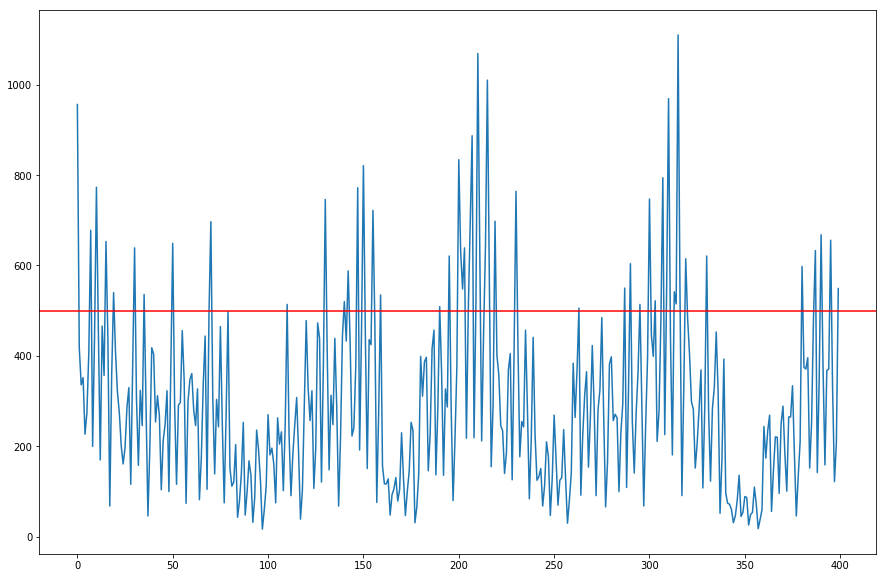

In [3]:
plt.figure(figsize=(15,10))
plt.plot(fr_razm)
plt.axhline(500, color='r')
plt.show()

Izdvojit ću samo one koji se pojavljuju preko 500 puta.

In [4]:
data = {'Indeks':  range(400),
        'Frekvencija': fr_razm}

df = pd.DataFrame (data, columns = ['Indeks','Frekvencija'])
over500=df[df['Frekvencija']>=500]
over500['Ime']=over500['Indeks'].apply(lambda x: inverz_razmaknuti(x))
over500.sort_values(by='Frekvencija', ascending=False, inplace=True)

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Izdvojit ću i sve *trojke* da vidim hoće li mi to išta reći.

In [5]:
def trojke(s):
    a=0
    a=ak.index(s[2])*1+ak.index(s[1])*20+ak.index(s[0])*400
    return(a)

tr=[]
for i in range(8000):
    tr.append(0)

f=open("300lip300walk.txt", "r")
for i in range(600):
    f.readline()
    line=f.readline()
    nl=line.rstrip()
    k=len(nl)
    for j in range(k-3):
        a=nl[j:j+3]
        b=trojke(a)
        tr[b]=tr[b]+1
f.close()

def inverz_trojke(br):
    slovo1=m.floor(br/400)
    res1=br%400
    slovo2=m.floor(res1/20)
    slovo3=res1%20
    
    return(ak[slovo1]+ak[slovo2]+ak[slovo3])

In [6]:
podaci = {'Indeks':  range(8000),
        'Frekvencija': tr}

df_trojke = pd.DataFrame (podaci, columns = ['Indeks','Frekvencija'])

over100_trojke=df_trojke[df_trojke['Frekvencija']>=100]
over100_trojke['Ime']=over100_trojke['Indeks'].apply(lambda x: inverz_trojke(x))

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


## Sad bih htjela od prethodnih trojki s rupom naći što se pojavljuje nakon njih kao *četvrto slovo*.

In [7]:
def cetvrto_slovo(s):
    a=0
    a=ak.index(s[3])*1+ak.index(s[2])*20+ak.index(s[0])*400
    return(a)

fr_4=[] #frekvencija tako razmaknutih
for i in range(8000):
    fr_4.append(0)
    
f=open("300lip300walk.txt", "r")
for i in range(600):
    f.readline()
    line=f.readline()
    nl=line.rstrip()
    k=len(nl)
    for j in range(k-4):
        a=nl[j:j+4]
        b=cetvrto_slovo(a)
        fr_4[b]=fr_4[b]+1
f.close()

def inverz_cetvrto_slovo(br):
    slovo1=m.floor(br/400)
    res1=br%400
    slovo3=m.floor(res1/20)
    res2=res1%20
    slovo4=res2%20
    
    return [ak[slovo1]+'_'+ak[slovo3]+ak[slovo4]]

In [8]:
podaci = {'Indeks':  range(8000),
        'Frekvencija': fr_4}

df_cs = pd.DataFrame (podaci, columns = ['Indeks','Frekvencija'])
over50=df_cs[df_cs['Frekvencija']>=50]
over50['Ime']=over50['Indeks'].apply(lambda x: inverz_cetvrto_slovo(x))
over50.sort_values(by='Frekvencija', ascending=False, inplace=True)

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [9]:
over50.head(20)

,Indeks,Frekvencija,Ime
6315,6315,179,[S_SS]
0,0,157,[A_AA]
5275,5275,153,[F_DS]
2843,2843,145,[G_ND]
4210,4210,145,[L_LL]
2947,2947,142,[G_GG]
4310,4310,138,[L_SL]
1342,1342,124,[D_GN]
5744,5744,122,[P_GC]
5741,5741,120,[P_GR]


In [10]:
over500

,Indeks,Frekvencija,Ime
315,315,1110,[S_S]
210,210,1069,[L_L]
215,215,1010,[L_S]
310,310,969,[S_L]
0,0,956,[A_A]
207,207,887,[L_G]
200,200,834,[L_A]
150,150,821,[G_L]
307,307,794,[S_G]
10,10,773,[A_L]


In [11]:
over100_trojke

,Indeks,Frekvencija,Ime
0,0,191,AAA
300,300,101,ASA
1510,1510,100,DSL
1687,1687,112,CCG
2875,2875,150,GDS
2947,2947,140,GGG
4210,4210,151,LLL
5343,5343,128,FGD
5967,5967,109,PYG
6213,6213,100,SLF


Vidim da su dosta zastupljene kombinacije slova L i S, možda bi one mogle tvoriti neki motiv. Pogledat ću ih izolirano.

In [12]:
over50['Ime']=over50['Ime'].astype(str).apply(lambda x: x[2:6])

C:\Users\Korisnik\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [13]:
over50[(over50['Ime'].str.match('[SL]_[SL][SL]')==True)]

,Indeks,Frekvencija,Ime
6315,6315,179,S_SS
4210,4210,145,L_LL
4310,4310,138,L_SL
4215,4215,112,L_LS
4315,4315,105,L_SS
6310,6310,103,S_SL
6210,6210,97,S_LL
6215,6215,85,S_LS


Stvarno ima dosta ponavljanja motiva S/L S/L _ S/L. Mutiraju li oni jedan u drugog u prirodi često? Ako da, to bi mogao biti neki početak motiva.

Dosta se pojavljuje i A_A, s tim da su najčešće trojke ASA i AAA.

In [14]:
over50[(over50['Ime'].str.match('A_A.')==True)]

,Indeks,Frekvencija,Ime
0,0,157,A_AA
7,7,115,A_AG
10,10,96,A_AL
15,15,79,A_AS
19,19,67,A_AV
1,1,54,A_AR


Mogu li išta odavde zaključiti? Vidim da mi nakon A_A dolazi A u 16% slučajeva, G u 12% i L u 10%, ali je li to dovoljno značajno da izdvojim kao "bazu" motiva?

In [15]:
df_trojke['Ime']=df_trojke['Indeks'].apply(lambda x: inverz_trojke(x))

In [16]:
df_trojke[(df_trojke['Ime'].str.match('A.A')==True)]

,Indeks,Frekvencija,Ime
0,0,191,AAA
20,20,51,ARA
40,40,33,ANA
60,60,25,ADA
80,80,14,ACA
100,100,16,AQA
120,120,30,AEA
140,140,73,AGA
160,160,7,AHA
180,180,28,AIA


Tu isto mogu izračunati distribuciju srednjeg slova od A_A. Jesu li mi ponavljanja veća od recimo 50 značajna ili nemam ništa od ovog?

Možda mi treba neki pametniji pristup jer ne znam kud bi došla daljnjim gledanjem ovako.

S i L prema blosum50 matrici ne prelaze jedan u drugog, broj je -3

# Šestorke

In [17]:
def sestorke(s):
    a=0
    a=ak.index(s[5])*1+ak.index(s[4])*20+ak.index(s[3])*400+ak.index(s[2])*8000+ak.index(s[1])*160000+ak.index(s[0])*3200000
    return(a)

fr_sestorke=[]
for i in range(64000000):
    fr_sestorke.append(0)
    
f=open("300lip300walk.txt", "r")
for i in range(600):
    f.readline()
    line=f.readline()
    nl=line.rstrip()
    k=len(nl)
    for j in range(k-6):
        a=nl[j:j+6]
        b=sestorke(a)
        fr_sestorke[b]=fr_sestorke[b]+1
f.close()


def inverz_sestorke(br):
    slovo1=m.floor(br/3200000)
    res1=br%3200000
    slovo2=m.floor(res1/160000)
    res2=res1%160000
    slovo3=m.floor(res2/8000)
    res3=res2%8000
    slovo4=m.floor(res3/400)
    res4=res3%400
    slovo5=m.floor(res4/20)
    slovo6=res4%20
    
    
    return(ak[slovo1]+ak[slovo2]+ak[slovo3]+ak[slovo4]+ak[slovo5]+ak[slovo6])

In [18]:
max(fr_sestorke)

32

In [19]:
np.argmax(fr_sestorke)

22670047

In [20]:
inverz_sestorke(22670047)

'GRFSNG'

32 puta se pojavljuje šestorka GRFSNG, možda bi oko nje mogao biti neki motiv.

In [21]:
podaci = {'Indeks':  range(64000000),
        'Frekvencija': fr_sestorke}

sestorke = pd.DataFrame (podaci, columns = ['Indeks','Frekvencija'])
sestorke = sestorke[sestorke['Frekvencija']>0]
sestorke['Ime'] = sestorke['Indeks'].apply(lambda x: inverz_sestorke(x))
sestorke.sort_values(by='Frekvencija', ascending=False, inplace=True)

In [22]:
sestorke.head(50)

,Indeks,Frekvencija,Ime
22670047,22670047,32,GRFSNG
52333502,52333502,31,TGRFSN
47416675,47416675,27,PTGRFS
23537562,23537562,21,GGNDYN
23004383,23004383,21,GDSLVD
44746875,44746875,21,FVFGDS
42750219,42750219,20,FGDSLV
25463215,25463215,19,GVNYAS
46457814,46457814,18,PLGCLP
22737170,22737170,17,GNNNYL


In [23]:
sestorke[(sestorke['Ime'].str.contains('GRFS')==True)].head(6)

,Indeks,Frekvencija,Ime
22670047,22670047,32,GRFSNG
52333502,52333502,31,TGRFSN
47416675,47416675,27,PTGRFS
22670067,22670067,15,GRFSDG
2616675,2616675,12,ATGRFS
52333503,52333503,9,TGRFSD


Gledam prvih 6 jer su mi to značajne brojke, ispod su po 3 ili manje ponavljanja.

U 4/6 redova kada naše ime ne započinje sa GRFS, tada se pojavljuje T prije njega pa lako moguće da je TGRFS značajno, ode vidimo da ima bar 79 takvih ponavljanja.

Nakon GRFS nam dolazi N u 63 slučaja ili D u 24 slučaja, tj imamo GRFSN 63 puta i GRFSD 24 puta.

U prvom i četvrtom redu bi me zanimalo što dolazi prije slova GRFS, možda bi to trebala pretražiti u tekstu. Isto tako u trećem i petom redu bi me zanimalo što dođe nakon slova GRFS pa bi i to trebalo istražiti.

U glavnom tekstu ću naći 10 znakova prije i poslije svakog GRFS i tako istražiti okolinu.

In [24]:
f=open("300lip300walk.txt", "r")
okoline=[]
for i in range(600):
    f.readline()
    line=f.readline()
    nl=line.rstrip()
    k=len(nl)
    j=0
    while j<=(k-24):
        a=nl[j:j+24]
        if a.find('GRFS')==10:
            okoline.append(a)
            j=j+24 
        else:
            j=j+1

f.close()

In [25]:
c.Counter(okoline)

Counter({'PYGIDFGGPTGRFSNGRTTVDVLT': 1,
         'YGQTFFGLPTGRFSDGRLISDFIA': 1,
         'GKDYPGGFATGRFSDGRVPSDLIA': 2,
         'YGETFFHHPTGRFSDGRLIIDFIA': 2,
         'GIDFDGGVATGRFSNGKVPGDIVA': 1,
         'YGETFFHHPTGRFSNGRLIIDFIA': 1,
         'GIDLPNHSPNGRFSNGKIFSDIIA': 1,
         'YGIDMNYQPTGRFSNGLTFIDLLA': 1,
         'ILDVSGYNYGGRFSLNQQMVNLET': 1,
         'YGIDFARGPTGRFSNGRNIPDFIA': 1,
         'GKSFPSKLSTGRFSDGKLATDFIV': 1,
         'YGETFFHHPSGRFSDGRLIIDFIA': 1,
         'GMDLPDGKANGRFSNGKLISDIIA': 1,
         'YGITFPQKPSGRFSDGRVATDFLA': 1,
         'NGQTFFHSPSGRFSDGRLIIDFIA': 1,
         'GIDYPTGRPTGRFSNGLNLPDIIS': 1,
         'YGIDFQYGPTGRFSNGKTTVDVIT': 1,
         'YGITFPGKPAGRFSDGRVATDFLA': 1,
         'YGIDFAAGPTGRFSNGLTTVDVIA': 1,
         'GIDFPTRRPTGRFSNGLNIPDLIS': 1,
         'GRDFVAHSATGRFSNGKLATDFTA': 1,
         'GIDFPTHRPTGRFSNGLNIPDLIS': 1,
         'YGETFFHRATGRFSDGRLVVDFIA': 1,
         'GRNFPGRKPTGRFSNGRLVPDLLN': 1,
         'GADFLGGRPTGRFSNGRLITDILA': 1,


In [26]:
grfsn=0
tgrfs=0
tgrfsn=0
for a in okoline:
    if 'GRFSN' in a:
        grfsn=grfsn+1
    if 'TGRFS' in a:
        tgrfs=tgrfs+1
    if 'TGRFSN' in a:
        tgrfsn=tgrfsn+1

In [27]:
grfsn

33

In [28]:
tgrfs

40

In [29]:
tgrfsn

31

In [30]:
np.size(okoline)

49

Od 49 24orki koje sadrže GRFS, u 31 prethodno dolazi T, a nakon N.

Pogledat ću bolje i bližu okolinu.

In [31]:
__grfs__=[]
for a in okoline:
    __grfs__.append(a[8:16])

In [32]:
c.Counter(__grfs__)

Counter({'PTGRFSNG': 22,
         'PTGRFSDG': 4,
         'ATGRFSDG': 4,
         'ATGRFSNG': 8,
         'PNGRFSNG': 1,
         'YGGRFSLN': 1,
         'STGRFSDG': 1,
         'PSGRFSDG': 3,
         'ANGRFSNG': 1,
         'PAGRFSDG': 2,
         'PTGRFSNA': 1,
         'LLGRFSDG': 1})

Izgleda mi nešto kao [P/A,T,G,R,F,S,N/D,G]

In [33]:
motivi=[]
for red in okoline:
    motivi.append(re.findall('[P|A]TGRFS[N|D]G',red))

Trenutno imam listu lista, a na tome ne mogu koristiti counter pa ću prebaciti u listu stringova.

In [34]:
s=""
motivi_s=[]
for j in motivi:
    s=""
    for i in j:
        s=s+i
    motivi_s.append(s)

In [35]:
c.Counter(motivi_s)

Counter({'PTGRFSNG': 22, 'PTGRFSDG': 4, 'ATGRFSDG': 4, 'ATGRFSNG': 8, '': 11})

Dakle imam 22+4+4+8=38 ponavljanja motiva [P/A]TGRFS[N/D]G u obliku:    
&emsp;    PTGRFSNG  22  
&emsp;    PTGRFSDG  4  
&emsp;    ATGRFSDG  4  
&emsp;    ATGRFSNG  8

In [38]:
np.size(podaci)

600

## GDS[N/L] pokušaj

In [39]:
sestorke.head(50)

,Indeks,Frekvencija,Ime
22670047,22670047,32,GRFSNG
52333502,52333502,31,TGRFSN
47416675,47416675,27,PTGRFS
23537562,23537562,21,GGNDYN
23004383,23004383,21,GDSLVD
44746875,44746875,21,FVFGDS
42750219,42750219,20,FGDSLV
25463215,25463215,19,GVNYAS
46457814,46457814,18,PLGCLP
22737170,22737170,17,GNNNYL


In [40]:
sestorke[(sestorke['Ime'].str.contains('GDS[LN]')==True)]

,Indeks,Frekvencija,Ime
23004383,23004383,21,GDSLVD
42750219,42750219,20,FGDSLV
62937510,62937510,17,VFGDSL
42750055,42750055,14,FGDSNS
8537502,8537502,14,NFGDSN
23001103,23001103,14,GDSNSD
30937510,30937510,9,IFGDSL
42750216,42750216,7,FGDSLT
23004323,23004323,6,GDSLTD
50137510,50137510,6,SFGDSL


In [44]:
f=open("300lip300walk.txt", "r")
okoline2=[]
for i in range(600):
    f.readline()
    line=f.readline()
    nl=line.rstrip()
    k=len(nl)
    j=0
    while j<=(k-24):
        a=nl[j:j+24]
        if a.find('GDSL')==10:
            okoline2.append(a)
            j=j+24 
        else:
            j=j+1

f.close()

In [45]:
c.Counter(okoline2)

Counter({'EPQVPCYFIFGDSLVDNGNNNRLR': 1,
         'VTNQAALFVFGDSLFDAGNNNYIN': 1,
         'SSTRDCREMLGDSLILMGEIGGND': 1,
         'SSSRDCREMLGDSLILMGEIGGND': 2,
         'SSSRDCREMLGDSLILMGEIGVND': 1,
         'SSTRDCKEMLGDSLILMGEIGGND': 1,
         'QARVPAMFVLGDSLVDAGNNNFLQ': 1,
         'DGIVPALFVFGDSLIDNGNNNNIP': 1,
         'QRALAASFVFGDSLVDAGNNNYLQ': 1,
         'GKKIPANFVFGDSLVDAGNNNYLA': 1,
         'TNAARAFFVFGDSLVDSGNNNYLV': 1,
         'DPIAPCYFIFGDSLVDSGNNNRLT': 1,
         'LASIPGLYVFGDSLVDAGNNNYLP': 1,
         'DPIAPCYFIFGDSLVDNGNNNQLQ': 1,
         'STSSLVTYIFGDSLTEVGNNNFLQ': 1,
         'VVEGRAFFVFGDSLVDSGNNNYLV': 1,
         'QANARAFLVFGDSLVDNGNNDFLA': 1,
         'AQKYAAIFNFGDSLVDAGNLVVDG': 1,
         'GVCFERIFSFGDSLTDTGNFLLSV': 1,
         'EPCYPRLFSFGDSLTDTGNFAFIY': 1,
         'APCYPRVFCFGDSLTDTGNIAFLY': 1,
         'APCYPRVFSFGDSLADTGNGPFLY': 1,
         'DPQVPCYFIFGDSLVDNGNNNYIV': 1,
         'KGKYRALFNFGDSLADAGNLLANG': 1,
         'ASAERAFFVFGDSLVDNGNNNYLI': 1,


In [52]:
___gdsl___=[]
for a in okoline2:
    ___gdsl___.append(a[7:18])

In [53]:
___gdsl___

['FIFGDSLVDNG',
 'FVFGDSLFDAG',
 'EMLGDSLILMG',
 'EMLGDSLILMG',
 'EMLGDSLILMG',
 'EMLGDSLILMG',
 'FVLGDSLVDAG',
 'FVFGDSLIDNG',
 'EMLGDSLILMG',
 'FVFGDSLVDAG',
 'FVFGDSLVDAG',
 'FVFGDSLVDSG',
 'FIFGDSLVDSG',
 'YVFGDSLVDAG',
 'FIFGDSLVDNG',
 'YIFGDSLTEVG',
 'FVFGDSLVDSG',
 'LVFGDSLVDNG',
 'FNFGDSLVDAG',
 'FSFGDSLTDTG',
 'FSFGDSLTDTG',
 'FCFGDSLTDTG',
 'FSFGDSLADTG',
 'FIFGDSLVDNG',
 'FNFGDSLADAG',
 'FVFGDSLVDNG',
 'FVFGDSLVDNG',
 'FVFGDSLVDAG',
 'FVFGDSLVDNG',
 'FVFGDSLTDNG',
 'FVFGDSLVDNG',
 'FVFGDSLADTG',
 'FSFGDSLSDAG',
 'FIFGDSLVDAG',
 'FSFGDSLTDTG',
 'FSFGDSLTDTG',
 'FVFGDSLVDNG',
 'YVFGDSLVDVG',
 'FQFGDSLSDTG',
 'YQFGDSLSDTG',
 'FIFGDSLVDNG',
 'FIFGDSLLDNG',
 'FIFGDSLFDNG']

In [54]:
c.Counter(___gdsl___)

Counter({'FIFGDSLVDNG': 4,
         'FVFGDSLFDAG': 1,
         'EMLGDSLILMG': 5,
         'FVLGDSLVDAG': 1,
         'FVFGDSLIDNG': 1,
         'FVFGDSLVDAG': 3,
         'FVFGDSLVDSG': 2,
         'FIFGDSLVDSG': 1,
         'YVFGDSLVDAG': 1,
         'YIFGDSLTEVG': 1,
         'LVFGDSLVDNG': 1,
         'FNFGDSLVDAG': 1,
         'FSFGDSLTDTG': 4,
         'FCFGDSLTDTG': 1,
         'FSFGDSLADTG': 1,
         'FNFGDSLADAG': 1,
         'FVFGDSLVDNG': 5,
         'FVFGDSLTDNG': 1,
         'FVFGDSLADTG': 1,
         'FSFGDSLSDAG': 1,
         'FIFGDSLVDAG': 1,
         'YVFGDSLVDVG': 1,
         'FQFGDSLSDTG': 1,
         'YQFGDSLSDTG': 1,
         'FIFGDSLLDNG': 1,
         'FIFGDSLFDNG': 1})

In [72]:
motivi2=[]
for red in okoline2:
    motivi2.append(re.findall('F[I|V]FGDSL.D.G',red))
    
s=""
motivi_s2=[]
for j in motivi2:
    s=""
    for i in j:
        s=s+i
    motivi_s2.append(s)
    
c.Counter(motivi_s2)

Counter({'FIFGDSLVDNG': 4,
         'FVFGDSLFDAG': 1,
         '': 21,
         'FVFGDSLIDNG': 1,
         'FVFGDSLVDAG': 3,
         'FVFGDSLVDSG': 2,
         'FIFGDSLVDSG': 1,
         'FVFGDSLVDNG': 5,
         'FVFGDSLTDNG': 1,
         'FVFGDSLADTG': 1,
         'FIFGDSLVDAG': 1,
         'FIFGDSLLDNG': 1,
         'FIFGDSLFDNG': 1})

###### 15 V na drugom mjestu, tj. 68%,    16 V od 22 znaka na 8. mjestu, tj.  73%,    13 N na 10. mjestu, tj.  59%  

Možda bi trebala još malo šire gledati s obzirom da su mi i prvi i zadnji znak fiksan dio motiva

In [93]:
gdsl=[]
for a in okoline2:
    gdsl.append(a[4:20])
c.Counter(gdsl)

Counter({'PCYFIFGDSLVDNGNN': 4,
         'AALFVFGDSLFDAGNN': 1,
         'DCREMLGDSLILMGEI': 4,
         'DCKEMLGDSLILMGEI': 1,
         'PAMFVLGDSLVDAGNN': 1,
         'PALFVFGDSLIDNGNN': 1,
         'AASFVFGDSLVDAGNN': 1,
         'PANFVFGDSLVDAGNN': 1,
         'RAFFVFGDSLVDSGNN': 2,
         'PCYFIFGDSLVDSGNN': 1,
         'PGLYVFGDSLVDAGNN': 1,
         'LVTYIFGDSLTEVGNN': 1,
         'RAFLVFGDSLVDNGNN': 1,
         'AAIFNFGDSLVDAGNL': 1,
         'ERIFSFGDSLTDTGNF': 1,
         'PRLFSFGDSLTDTGNF': 1,
         'PRVFCFGDSLTDTGNI': 1,
         'PRVFSFGDSLADTGNG': 1,
         'RALFNFGDSLADAGNL': 1,
         'RAFFVFGDSLVDNGNN': 4,
         'PATFVFGDSLVDAGNN': 1,
         'PAMFVFGDSLTDNGNN': 1,
         'PCYFVFGDSLVDNGNN': 1,
         'NAMFVFGDSLADTGNI': 1,
         'EAIFSFGDSLSDAGNL': 1,
         'GASFIFGDSLVDAGNN': 1,
         'SRVFSFGDSLTDTGNA': 1,
         'SRLFSFGDSLTDTGNL': 1,
         'PAMYVFGDSLVDVGNN': 1,
         'DRIFQFGDSLSDTGNC': 1,
         'NRIYQFGDSLSDTGNC': 1,
        

Prvo slovo: 18/43 ih počinje na P, 8/43 na R, zajedno su 26/43 tj 60% što nije loše, mogao bi biti dio motiva  
Drugo slovo: 13 C, 20A, skupa 77% (+8R)  
Treće slovo: ima svega, ničeg više od 7  
4.-10. slovo: F[I|V]FGDSL  
11.-16. slovo: .D.GNN

In [95]:
motivi3=[]
for red in okoline2:
    motivi3.append(re.findall('[P|R][C|A].F[I|V]FGDSL.D.GNN',red))
    
s=""
motivi_s3=[]
for j in motivi3:
    s=""
    for i in j:
        s=s+i
    motivi_s3.append(s)
    
c.Counter(motivi_s3)

Counter({'PCYFIFGDSLVDNGNN': 4,
         '': 25,
         'PALFVFGDSLIDNGNN': 1,
         'PANFVFGDSLVDAGNN': 1,
         'RAFFVFGDSLVDSGNN': 2,
         'PCYFIFGDSLVDSGNN': 1,
         'RAFFVFGDSLVDNGNN': 4,
         'PATFVFGDSLVDAGNN': 1,
         'PAMFVFGDSLTDNGNN': 1,
         'PCYFVFGDSLVDNGNN': 1,
         'PCYFIFGDSLLDNGNN': 1,
         'PCLFIFGDSLFDNGNN': 1})

18 motiva oblika [P|R][C|A].F[I|V]FGDSL.D.GNN

In [81]:
np.size(gdsl)

43